In [42]:
"""ML Project-1.ipynb
Group Members:
A20584318 - ANSH KAUSHIK
A20593046 - ARUNESHWARAN SIVAKUMAR
A20588339 - HARISH NAMASIVAYAM MUTHUSWAMY
A20579993 - SHARANYA MISHRA
"""

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy.sparse import csr_matrix

### EDA for Ames Housing Dataset:

In [44]:
# Load Ames dataset (assuming you have a CSV file)
data = pd.read_csv('./Ames.csv')  # Replace with your dataset path

In [45]:
data.head(20)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000.0
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000.0
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000.0
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900.0
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,1,2008,WD,Normal,118000.0


In [46]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,2919.0,1460.000000,842.787043,1.0,730.5,1460.0,2189.5,2919.0
MSSubClass,2919.0,57.137718,42.517628,20.0,20.0,50.0,70.0,190.0
LotFrontage,2433.0,69.305795,23.344905,21.0,59.0,68.0,80.0,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallQual,2919.0,6.089072,1.409947,1.0,5.0,6.0,7.0,10.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1965.0,1993.0,2004.0,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.0,368.5,733.0,5644.0


Understanding the distribution of each feature:

/var/folders/8y/86cllr6j79zg2fhb_z3mrzzr0000gn/T/ipykernel_46589/1469724773.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm), 'value')
/var/folders/8y/86cllr6j79zg2fhb_z3mrzzr0000gn/T/ipykernel_46589/1469724773.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  

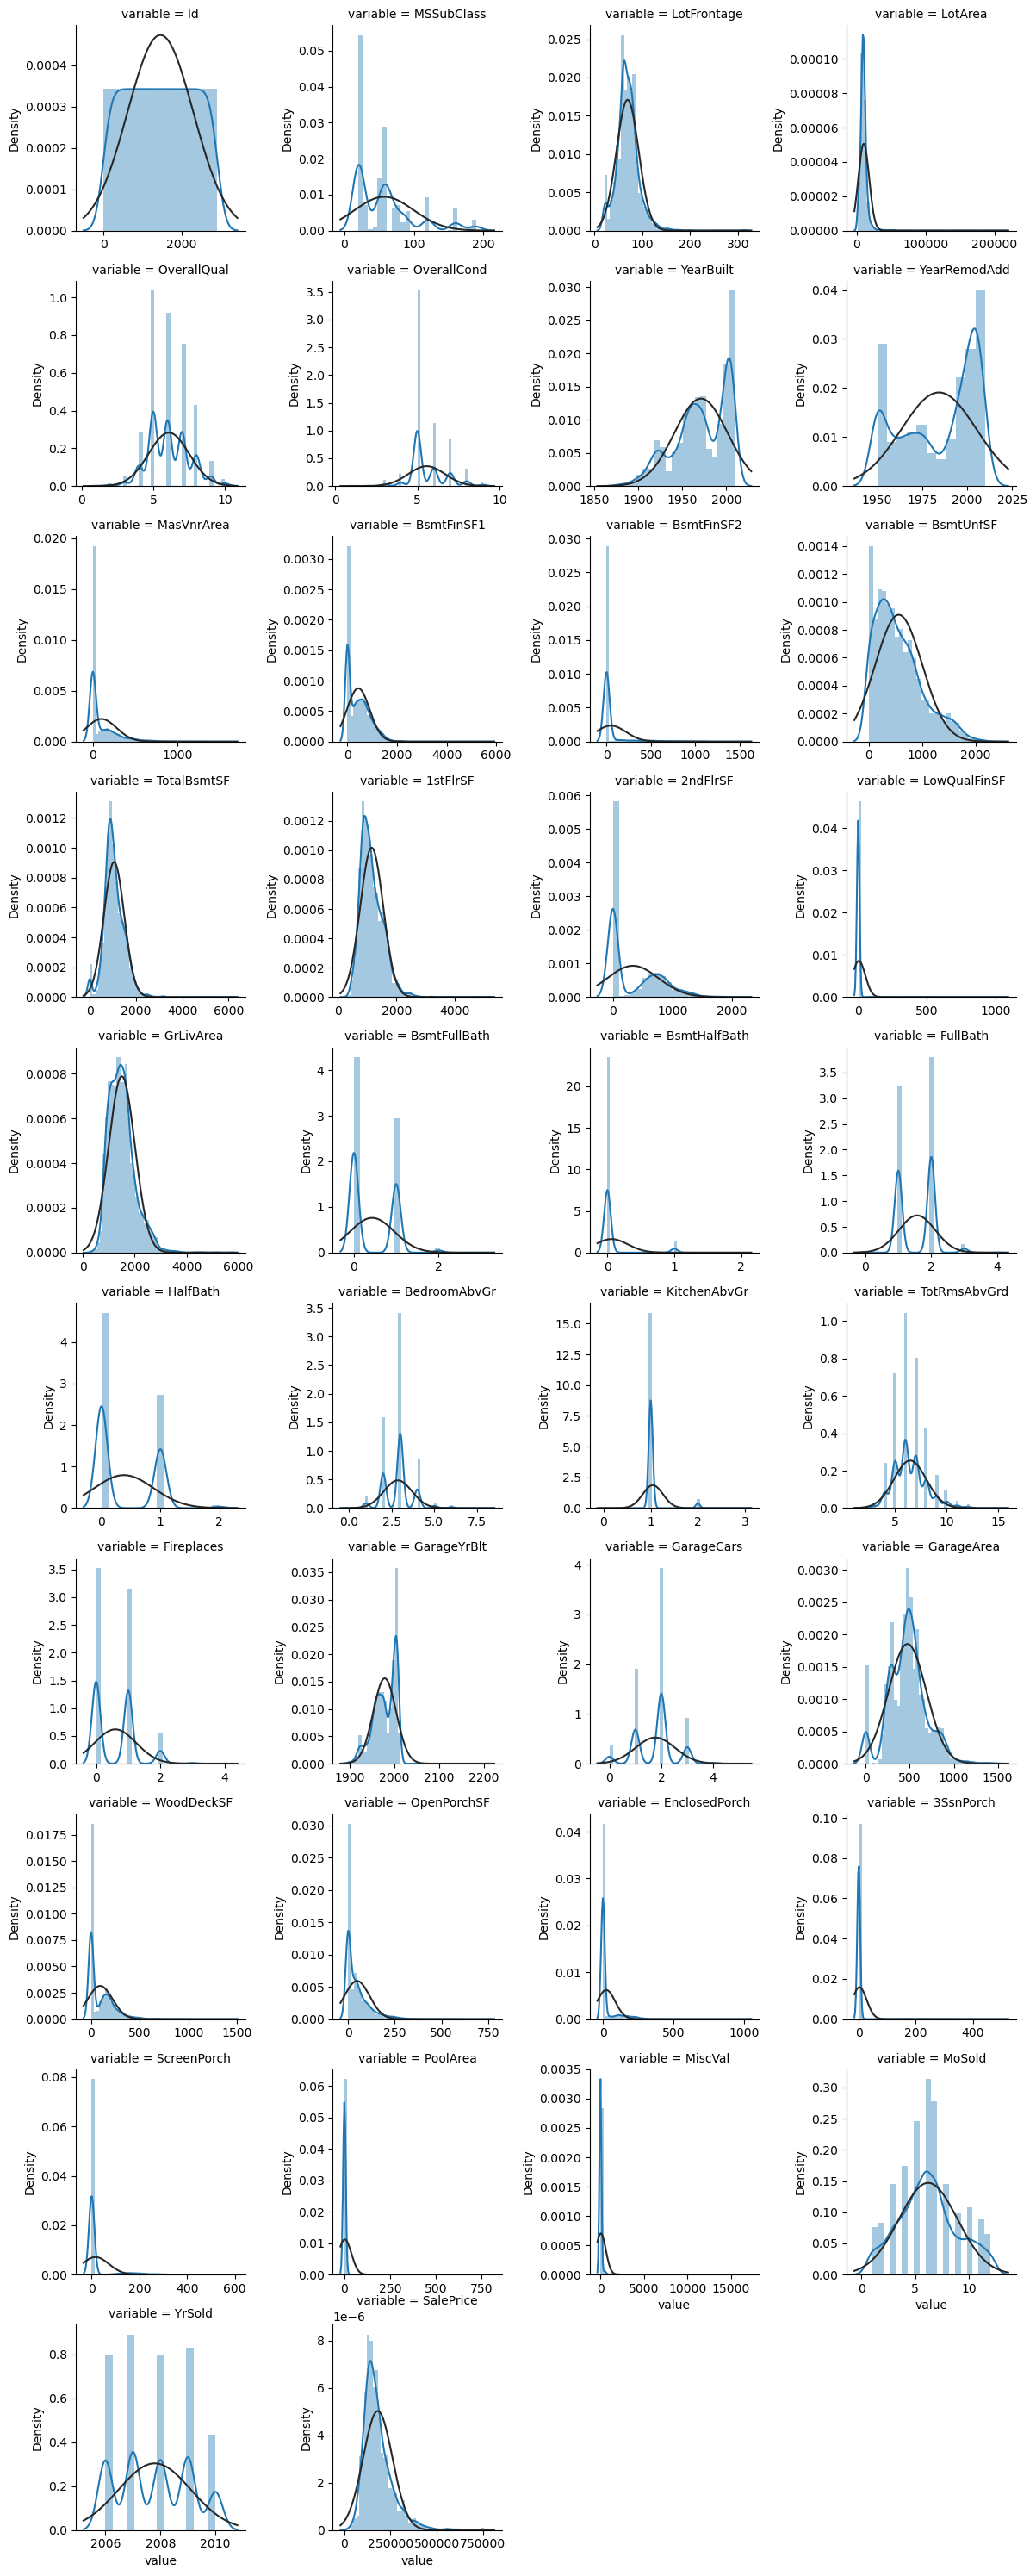

In [48]:
df_num = data.select_dtypes(include = ['float64', 'int64'])
# Histogram to display skewness of every numeric variable
f = pd.melt(df_num, value_vars = df_num.columns)
g = sns.FacetGrid(f, col="variable",  col_wrap=4, sharex=False, sharey=False)
g.map(lambda _x, **kwargs: sns.distplot(_x, fit = norm), 'value')

Since the distribution of SalePrice is right-skewed, a transformation is necessary to improve the model's performance. To address this skewness, we will apply normalization followed by a log transformation. This approach will help create a more symmetrical distribution, making the data more suitable for our analysis.

In [50]:
# Check for missing values and print the missing columns with their counts
missing_counts = data.isnull().sum()

# Filter to get columns with missing values
missing_columns = missing_counts[missing_counts > 0]

if not missing_columns.empty:
    # Sort missing columns in descending order
    sorted_missing_columns = missing_columns.sort_values(ascending=False)

    print("Columns with missing values and their counts (sorted in descending order):")
    print(sorted_missing_columns)
else:
    print("No missing values in the DataFrame.")

Columns with missing values and their counts (sorted in descending order):
PoolQC          2909
MiscFeature     2814
Alley           2721
Fence           2348
MasVnrType      1766
SalePrice       1459
FireplaceQu     1420
LotFrontage      486
GarageCond       159
GarageYrBlt      159
GarageFinish     159
GarageQual       159
GarageType       157
BsmtExposure      82
BsmtCond          82
BsmtQual          81
BsmtFinType2      80
BsmtFinType1      79
MasVnrArea        23
MSZoning           4
Functional         2
BsmtHalfBath       2
BsmtFullBath       2
Utilities          2
KitchenQual        1
TotalBsmtSF        1
BsmtUnfSF          1
GarageCars         1
GarageArea         1
BsmtFinSF2         1
BsmtFinSF1         1
Exterior2nd        1
Exterior1st        1
SaleType           1
Electrical         1
dtype: int64


In addition to the numerical columns, incorporating a selection of categorical columns is essential for our analysis. These categorical features can significantly enhance the model's predictive power. To effectively include them in our regression analysis, we will utilize one-hot encoding, transforming these categorical variables into a format suitable for our model. These columns include

1. Neighborhood:
Why Important: Location is crucial in determining property values, and different neighborhoods in Ames have vastly different average sale prices based on amenities, proximity to important places, and overall desirability.

2. ExterQual (Exterior Quality):
Why Important: The exterior quality of a home reflects its condition and curb appeal, which significantly influences buyer perception and sale price. Selecting only the desired columns

In [52]:
selected_columns = ['OverallQual', 'LotFrontage', 'GrLivArea', 'GarageCars', 'Neighborhood', 'TotalBsmtSF', 'ExterQual', 'SalePrice']

# Creating a new DataFrame with these columns
df_selected = data[selected_columns]

In [53]:
#Create one-hot encoding for all specified categorical columns
categorical_columns=['Neighborhood','ExterQual']
df_selected = pd.get_dummies(df_selected, columns=categorical_columns, prefix=categorical_columns, dtype=int)

# Display the result
df_selected

,OverallQual,LotFrontage,GrLivArea,GarageCars,TotalBsmtSF,SalePrice,Neighborhood_Blmngtn,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,...,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,ExterQual_Ex,ExterQual_Fa,ExterQual_Gd,ExterQual_TA
0,7,65.0,1710,2.0,856.0,208500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,6,80.0,1262,2.0,1262.0,181500.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,7,68.0,1786,2.0,920.0,223500.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,7,60.0,1717,3.0,756.0,140000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,8,84.0,2198,3.0,1145.0,250000.0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2914,4,21.0,1092,0.0,546.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2915,4,21.0,1092,1.0,546.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2916,5,160.0,1224,2.0,1224.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2917,5,62.0,970,0.0,912.0,NaN,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [54]:
# Function to print strong correlations
def print_strong_correlations(corr_matrix, threshold=0.6):
    print("\nStrong Correlations (|correlation| > {}):".format(threshold))
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                print("{} - {}: {:.2f}".format(corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))

# Example usage:
correlation_matrix = df_selected.corr()  # Assuming 'train' is your DataFrame
print_strong_correlations(correlation_matrix, threshold=0.6)


Strong Correlations (|correlation| > 0.6):
GarageCars - OverallQual: 0.60
SalePrice - OverallQual: 0.79
SalePrice - GrLivArea: 0.71
SalePrice - GarageCars: 0.64
SalePrice - TotalBsmtSF: 0.61
ExterQual_TA - OverallQual: -0.64
ExterQual_TA - ExterQual_Gd: -0.90


In [55]:
#to check if the Data is Successfully cleaned.
df_selected.isnull().sum()

OverallQual                0
LotFrontage              486
GrLivArea                  0
GarageCars                 1
TotalBsmtSF                1
SalePrice               1459
Neighborhood_Blmngtn       0
Neighborhood_Blueste       0
Neighborhood_BrDale        0
Neighborhood_BrkSide       0
Neighborhood_ClearCr       0
Neighborhood_CollgCr       0
Neighborhood_Crawfor       0
Neighborhood_Edwards       0
Neighborhood_Gilbert       0
Neighborhood_IDOTRR        0
Neighborhood_MeadowV       0
Neighborhood_Mitchel       0
Neighborhood_NAmes         0
Neighborhood_NPkVill       0
Neighborhood_NWAmes        0
Neighborhood_NoRidge       0
Neighborhood_NridgHt       0
Neighborhood_OldTown       0
Neighborhood_SWISU         0
Neighborhood_Sawyer        0
Neighborhood_SawyerW       0
Neighborhood_Somerst       0
Neighborhood_StoneBr       0
Neighborhood_Timber        0
Neighborhood_Veenker       0
ExterQual_Ex               0
ExterQual_Fa               0
ExterQual_Gd               0
ExterQual_TA  

1. Checking for Ames-Dataset:

In [57]:
#df_selected.to_csv('new_ames.csv',index=False) 

In [58]:
import os
import sys

# Get the current notebook's absolute path and convert it to a directory path
current_notebook_path = os.path.abspath(os.getcwd())

# Append the parent directory (Project1) to the system path
project_root = os.path.dirname(current_notebook_path)
sys.path.append(project_root)

In [59]:
from models.ElasticNet import ElasticNetRegression
from models.ElasticNet import train_test_split
import csv
import numpy

def test_predict():
    model = ElasticNetRegression(alpha=0.1, l1_ratio=0.6, iterations=10000, learning_rate=0.0001)
    data = []
    with open("new_ames.csv", "r") as file:
        reader = csv.DictReader(file)
        for row in reader:
            data.append(row)

    # Extract features and target variable from the CSV data using list comprehension
    X = np.array([[float(row[col]) for col in row if col != 'SalePrice'] for row in data])
    y = np.array([float(row['SalePrice']) for row in data])
    
    # Normalize features (optional but recommended for elastic net)
    X = (X - X.mean(axis=0)) / X.std(axis=0)
    
    # Normalize target variable (scaling it down to avoid large values affecting calculations)
    y = (y - y.mean()) / y.std()
    
    # Split dataset into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
    
    # Create an instance of ElasticNetRegression
    elastic_net = ElasticNetRegression(alpha=0.1, l1_ratio=0.5, iterations=10000, learning_rate=0.0001)
    
    # Train the model
    elastic_net.fit(X_train, y_train)
    
    # Predict on both training and test sets
    y_train_pred = elastic_net.predict(X_train)
    y_test_pred = elastic_net.predict(X_test)
    
    # Calculate accuracy metrics
    train_mse = elastic_net.mean_squared_error(y_train, y_train_pred)
    test_mse = elastic_net.mean_squared_error(y_test, y_test_pred)
    
    train_r2 = elastic_net.r2_score(y_train, y_train_pred)
    test_r2 = elastic_net.r2_score(y_test, y_test_pred)

    # Checking bias
    train_residuals = y_train_pred - y_train
    test_residuals = y_test_pred - y_test
    train_mean_bias = np.mean(train_residuals)
    test_mean_bias = np.mean(test_residuals)
      
    # Print the results
    print(f"Training Mean Squared Error: {train_mse}")
    print(f"Training R-Squared: {train_r2}")
    print(f"Training Mean Bias: {train_mean_bias}")
    print(f"Testing Mean Squared Error: {test_mse}")
    print(f"Testing R-Squared: {test_r2}")
    print(f"Testing Mean Bias: {test_mean_bias}")
    
    # Plot predicted vs actual values
    plt.scatter(y_test, y_test_pred)
    plt.xlabel("Actual Values")
    plt.ylabel("Predicted Values")
    plt.title("Predicted vs. Actual Values (Test Set)")
    plt.grid(True)
    plt.show()

Iteration 0: Coefficients: [ 2.34142044e-06  8.27123296e-05  3.65434288e-05  7.41176130e-05
  6.75541352e-05  6.49353188e-05  5.63156903e-07 -2.92484996e-06
 -8.69590185e-06 -1.65011308e-05  9.91730686e-07  6.70342828e-06
  5.59134796e-06 -1.88456717e-05  3.83478847e-06 -1.67760652e-05
 -8.29034616e-06 -7.18884602e-06 -1.90185812e-05 -3.89382798e-06
 -5.02440685e-07  3.60468184e-05  4.41372040e-05 -2.00924724e-05
 -7.42269471e-06 -1.08083325e-05  1.45537172e-06  1.53409974e-05
  2.38053349e-05  1.34734818e-05  9.37501114e-06  5.24918289e-05
 -1.17733626e-05  4.73139688e-05 -6.43140003e-05]
Iteration 1000: Coefficients: [-1.15390456e-06  6.32740139e-02  2.53153247e-02  5.74752148e-02
  5.00353125e-02  4.88409300e-02 -4.41432860e-06 -4.76429630e-06
 -2.26401228e-03 -8.04354919e-03  2.82818235e-06  2.40492170e-05
  5.15188701e-04 -1.04405648e-02  6.79944779e-06 -8.97425454e-03
 -1.70874866e-03 -1.08455747e-03 -1.02757128e-02  1.82916075e-06
  2.24855336e-07  2.53722470e-02  3.11127709e-02

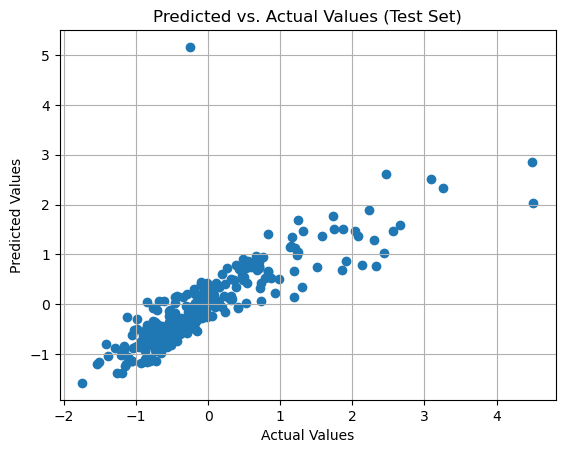

In [60]:
test_predict()

Our model gives R2 score of around 0.78 for train and 0.80 for test. Also, as we can see the bias is almost negligible hence our code works fine. The bias analysis indicates that our model exhibits negligible bias, with the mean bias close to zero. The residuals are randomly scattered around the horizontal line, suggesting no systematic underprediction or overprediction. This confirms that the model is well-calibrated and performs reliably.